# fig1B_C

Code to make figures for the first row of the snell's figure, making use of our tool

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib
import imageio

sns.set()

import utils

import sys
sys.path.append('../')
from snell import snell

%matplotlib notebook
%load_ext autoreload
%autoreload

In [2]:
# Set some variables
ddisp = 0.5
dispcm = 2
dispres=2000

# Figure 1a -- Snell Context -- Snell Illustration

# Figure 1b -- Graph of effect
Plot figure 1b, which shows that $\theta(\tilde\theta)$ has an inverse

In [3]:
# Read in display file
display, tres, spatLUT, spatLUT_inv, h, dSc, dz, fresnel, fresdisplay = utils.read_display('display-dSc_h_10_fresdisplay.pickle')
display_, tres_, spatLUT_, spatLUT_inv_, h, dSc, dz, fresnel_, fresdisplay_ = utils.read_display('display-dSc_h_0.1_fresdisplay.pickle')

In [4]:
tres_inv = tres[spatLUT.astype('int')]
tres_inv[tres_inv==90] = np.nan

tres_inv_ = tres_[spatLUT_.astype('int')]
tres_inv_[tres_inv_==90] = np.nan

In [5]:
# Set global plot parameters
matplotlib.rcParams['axes.linewidth'] = 3
matplotlib.rcParams['xtick.major.size'] = 10
matplotlib.rcParams['ytick.major.size'] = 10

/home/twd/.conda/envs/snell/lib/python3.6/site-packages/matplotlib/figure.py:2267: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


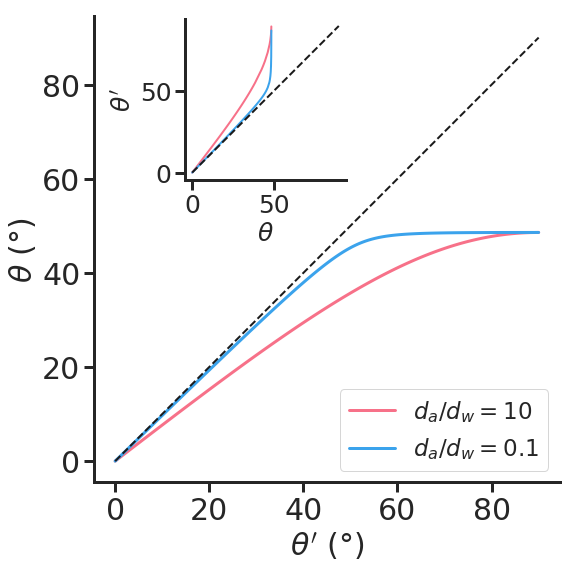

In [6]:
plt.figure(figsize=(8,8))
sns.set_style('ticks',{"xtick.major.size": "10", "ytick.major.size": "10",'axes.linewidth': 3})

a = sns.color_palette("husl",3)

line1, = plt.plot(tres,spatLUT_inv,label=r'$d_a/d_w = 10$',color=a[0],linewidth=3)
line3, = plt.plot(tres_,spatLUT_inv_,label=r'$d_a/d_w = 0.1$',color=a[2],linewidth=3)

plt.xlabel(r'$\theta^\prime$ (°)',size=30)
plt.ylabel(r'$\theta$ (°)',size=30)
plt.plot([0, 90],[0,90],'--k',linewidth=2)
ax = plt.gca()
ax.tick_params(width=3,labelsize=30)
plt.axis('square')
plt.legend(fontsize=23,loc=4)
sns.despine()

plt.axes([.32, .68, .28, .28])
plt.plot(tres,tres_inv,color=a[0],linewidth=2)
plt.plot(tres_,tres_inv_,color=a[2],linewidth=2)
plt.plot([0, 90],[0,90],'--k',linewidth=2)
plt.axis('square')
ax = plt.gca()
ax.tick_params(width=3,labelsize=25)
sns.despine()
plt.ylabel(r'$\theta^\prime$',size=25)
plt.xlabel(r'$\theta$',size=25)

plt.tight_layout()
#plt.savefig('./paper/v3/fig1b_v3.pdf')

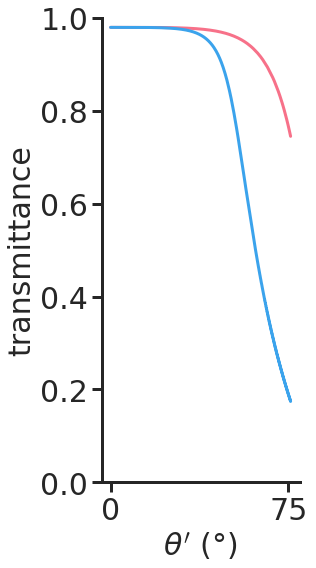

In [7]:
plt.figure(figsize=(4.5,8))
a = np.arange(2000)
b = sns.color_palette("husl",3)
plt.plot(np.arctan(a*dispcm/dispres/0.5)*180/np.pi,fresdisplay[0,:],label='dSc/d=10',color=b[0],linewidth=3)
plt.plot(np.arctan(a*dispcm/dispres/0.5)*180/np.pi,fresdisplay_[0,:],label='dSc/d=0.1',color=b[2],linewidth=3)
plt.xlabel(r'$\theta^\prime$ (°)',size=30)
plt.ylim([0, 1])
plt.ylabel('transmittance',size=30)
ax = plt.gca()
ax.tick_params(width=3,labelsize=30)
plt.xticks([0, 75],['0', '75'])
plt.tight_layout()
sns.despine()
#plt.savefig('./paper/v3/fig1bii_v3.pdf')

# Figure 1c -- Illustration of effect

In [8]:
display_stochastic = snell.snell(dispres = 1000, dispcm = 4, da = 1/11, dw = 1*10/11)
display_stochastic.make_display()

In [9]:
OMR_air = imageio.imread('../examples/example_grating_dsm.tif')
OMR_air=255*(OMR_air-np.min(OMR_air))/(np.max(OMR_air)-np.min(OMR_air))

OMR_snell_stochastic = display_stochastic.transform_images_loop(OMR_air, 
                                                                 min_lux = 1, 
                                                                 max_lux = 500)

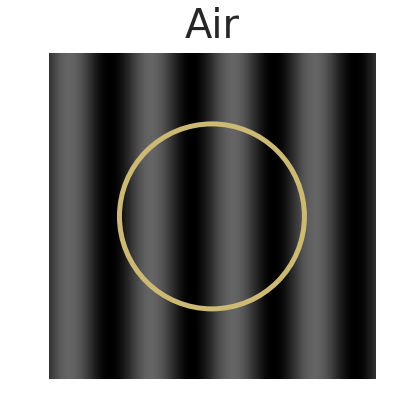

In [10]:
sns.set_style('ticks')
VMAX = 650
plt.figure(figsize=(6,6))
plt.imshow(OMR_air,vmax=VMAX,interpolation='none',cmap='gray')
plt.axis('off')
plt.title('Air',fontsize=40)
ttl = plt.gca().title
ttl.set_position([.5, 1.03])
display_stochastic.add_scale(lw=5)
#plt.savefig('./paper/v4/fig1ci.pdf')

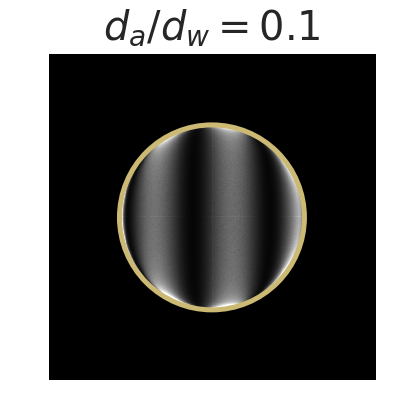

In [11]:
sns.set_style('ticks')
VMAX = 650
plt.figure(figsize=(6,6))
plt.imshow(OMR_snell_stochastic,vmax=VMAX,interpolation='none',cmap='gray')
plt.axis('off')
plt.title(r'$d_a/d_w = 0.1$',fontsize=40)
ttl = plt.gca().title
ttl.set_position([.5, 1.03])
display_stochastic.add_scale(lw=5)
#plt.savefig('./paper/v4/fig1cii.pdf')

In [12]:
display_stochastic = snell.snell(dispres = 1000, dispcm = 4, da = 10/11, dw = 1/11)
display_stochastic.make_display()

In [13]:
OMR_air = imageio.imread('../examples/example_grating_dsm.tif')
OMR_air=255*(OMR_air-np.min(OMR_air))/(np.max(OMR_air)-np.min(OMR_air))

OMR_snell_stochastic = display_stochastic.transform_images_loop(OMR_air, 
                                                                 min_lux = 1, 
                                                                 max_lux = 500)

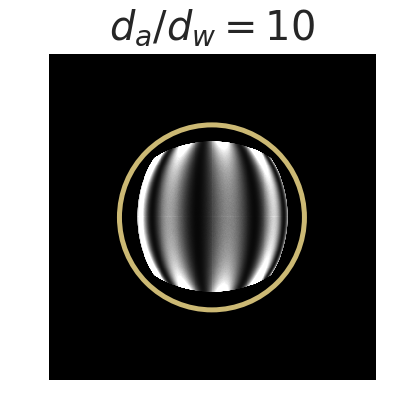

In [14]:
sns.set_style('ticks')
VMAX = 650
plt.figure(figsize=(6,6))
plt.imshow(OMR_snell_stochastic,vmax=VMAX,interpolation='none',cmap='gray')
plt.axis('off')
plt.title(r'$d_a/d_w = 10$',fontsize=40)
ttl = plt.gca().title
ttl.set_position([.5, 1.03])
display_stochastic.add_scale(lw=5)
#plt.savefig('./paper/v4/fig1ciii.pdf')